In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [3]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing/ Splitting into Train/Valid/Test Set

In [5]:
import tensorflow as tf
 
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)
 
# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

### Scaling out Data

Now, the most simple method to do that is : 

value – (min value of the column) / (range of the column)



In [6]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)
 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
 
val_df =  (val_df- min_val)/range

In [8]:
train_df.shape

(1199, 12)

In [9]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
289,0.619469,0.205479,0.670886,0.165517,0.155259,0.450704,0.325088,0.802496,0.295652,0.375758,0.123077,0.4
962,0.176991,0.308219,0.025316,0.082759,0.171953,0.070423,0.035336,0.475037,0.452174,0.218182,0.169231,0.4
826,0.256637,0.102740,0.430380,0.096552,0.063439,0.042254,0.007067,0.369310,0.469565,0.187879,0.400000,0.8
495,0.539823,0.157534,0.670886,0.117241,0.096828,0.056338,0.035336,0.523495,0.252174,0.193939,0.400000,1.0
57,0.256637,0.349315,0.151899,0.289655,0.165275,0.690141,0.367491,0.604258,0.347826,0.266667,0.153846,0.4


In [10]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

In [11]:
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]
 
input_shape

[11]

# Create Model Neural Network

### Create a linear Model

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### Creating a Multilayered Neural Network

In [14]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [15]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',                
              # MAE error is good for
              # numerical predictions
              loss='mae') 

# Training The Model

In [16]:
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch
 
                   )

Epoch 1/15
5/5 [==============================] - 1s 54ms/step - loss: 0.5276 - val_loss: 0.4165
Epoch 2/15
5/5 [==============================] - 0s 10ms/step - loss: 0.3470 - val_loss: 0.2355
Epoch 3/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1967 - val_loss: 0.1684
Epoch 4/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1780 - val_loss: 0.1824
Epoch 5/15
5/5 [==============================] - 0s 11ms/step - loss: 0.1828 - val_loss: 0.1665
Epoch 6/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1622 - val_loss: 0.1483
Epoch 7/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1481 - val_loss: 0.1432
Epoch 8/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1425 - val_loss: 0.1381
Epoch 9/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1359 - val_loss: 0.1297
Epoch 10/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1282 - val_loss: 0.1224
Epoch 11/15
5/5 [===============

# Generate Predictions and Analyze Accuracy

In [17]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 104ms/step


array([[0.45148414],
       [0.55810696],
       [0.47469398]], dtype=float32)

In [18]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

# Visualize Training Vs Validation Loss

<AxesSubplot:>

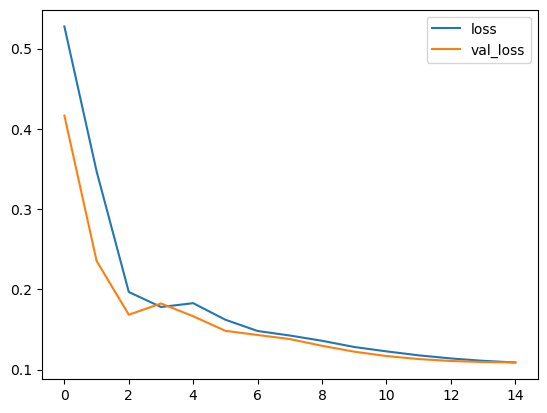

In [19]:

loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()